In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

final_path = '/content/drive/MyDrive/ajou/41_ML/project/modified data/final_nba_data_2.csv'
final_data =  pd.read_csv(final_path, encoding='ISO-8859-1')

R² Score: 0.774292779410221
Adjusted R² Score: 0.7573261774068891


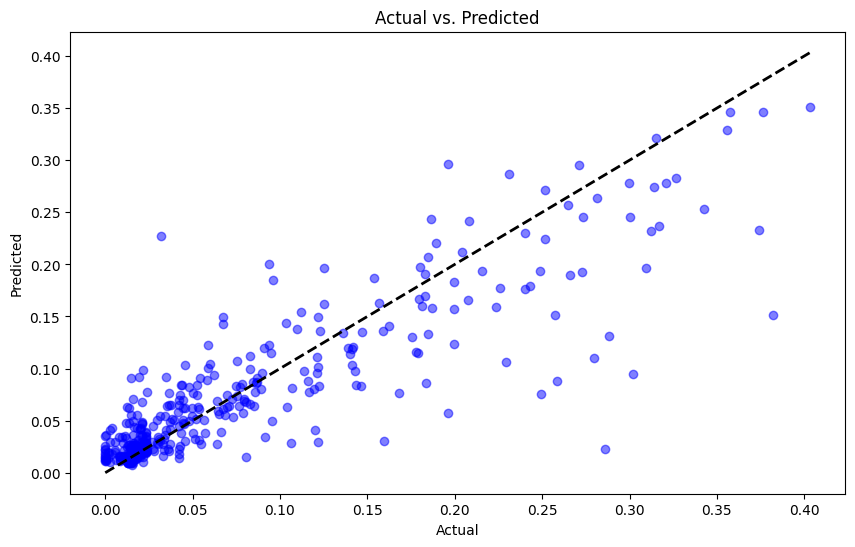

In [5]:
# test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 입력 열과 타겟 열 선택
X = final_data[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
                'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
                'birth', 'contract_period', 'Annual', 'Pos_PG', 'Pos_SG', 'Pos_SF', 'Pos_PF', 'Pos_C']]
y = final_data['target']

# 데이터 정규화 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
predictions = rf_model.predict(X_test)

# R² 및 Adjusted R² 계산
r2 = rf_model.score(X_test, y_test)
n_samples = len(y_test)
n_features = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

# 출력
print("R² Score:", r2)
print("Adjusted R² Score:", adj_r2)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

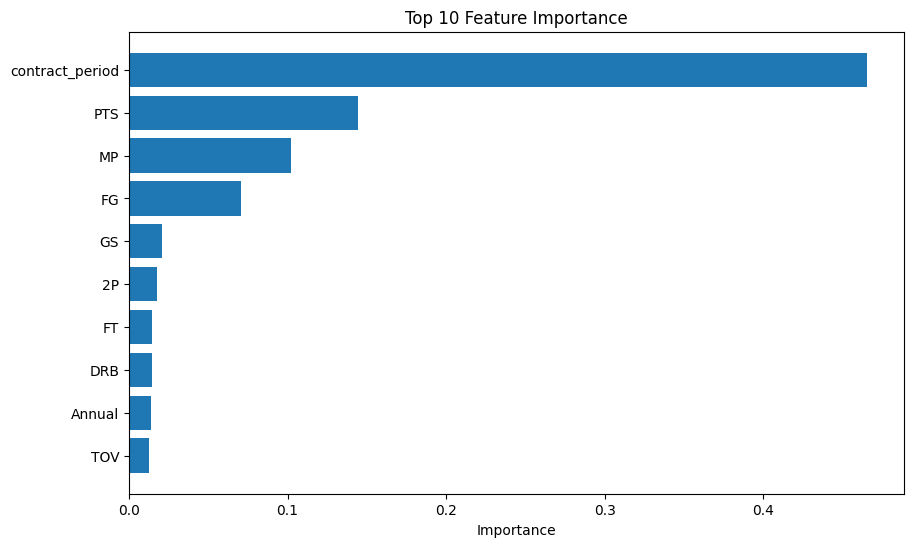

Top 10 Features:
contract_period
PTS
MP
FG
GS
2P
FT
DRB
Annual
TOV


In [7]:
import numpy as np

# 모델의 피처 중요도 추출
importances = rf_model.feature_importances_

# 피처 중요도를 기준으로 정렬
indices = np.argsort(importances)[::-1]

# 상위 10개 피처 선택
top_features_indices = indices[:10]
top_features = [X.columns[i] for i in top_features_indices]

# Feature Importance 시각화 (상위 10개 특성)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_indices)), importances[top_features_indices], align='center')
plt.yticks(range(len(top_features_indices)), top_features)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  # 상위 중요도를 위에 오도록 순서 뒤집기
plt.show()

# 상위 10개 Feature 출력
print("Top 10 Features:")
for feature in top_features:
    print(feature)

Best R² Score: 0.8064447013337965
Best Adjusted R² Score: 0.805385092034529
Best Features: ['contract_period', 'PTS', 'GS', 'FT', 'DRB', 'Annual']


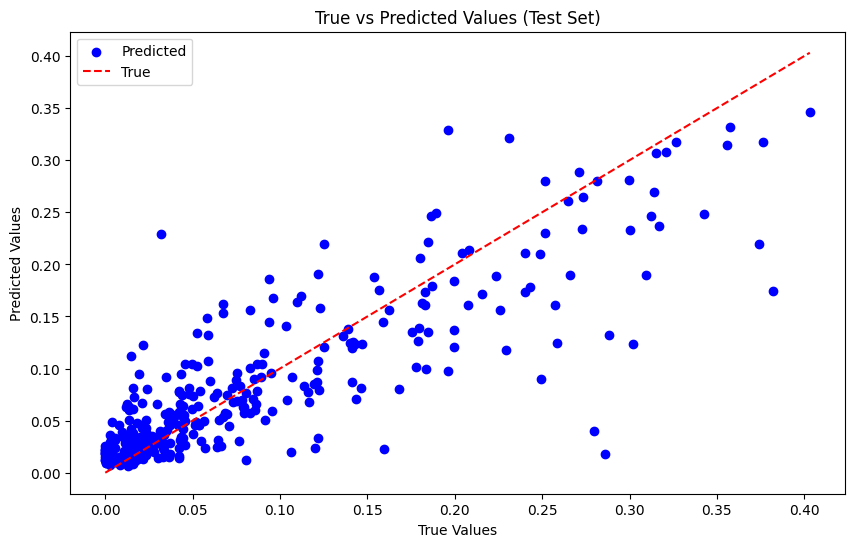

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

# 모델의 피처 중요도 추출
importances = rf_model.feature_importances_

# 피처 중요도를 기준으로 정렬
indices = np.argsort(importances)[::-1]

# 상위 10개 피처 선택
top_features_indices = indices[:10]
top_features = [X.columns[i] for i in top_features_indices]

best_score = float('-inf')
best_features = None
best_adj_r2 = float('-inf')  # 초기값 설정

# 모든 가능한 특성 조합 탐색
for r in range(1, 11):  # 상위 10개 특성을 고려하여 범위 수정
    for combo in combinations(top_features, r):  # 상위 10개 특성만 고려하여 범위 수정
        features = list(combo)
        X_subset = X_train[:, [X.columns.get_loc(col) for col in features]]
        model = RandomForestRegressor(random_state=42)
        scores = cross_val_score(model, X_subset, y_train, cv=5, scoring='r2')
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_features = features

            # Adjusted R² 계산
            n_samples = len(y_train)
            n_features = len(features)
            adj_r2 = 1 - (1 - score) * (n_samples - 1) / (n_samples - n_features - 1)
            best_adj_r2 = adj_r2  # 최적의 Adjusted R² 갱신

print("Best R² Score:", best_score)
print("Best Adjusted R² Score:", best_adj_r2)  # Adjusted R² 출력
print("Best Features:", best_features)

# 선택된 특성으로 데이터 준비
X_best_train = X_train[:, [X.columns.get_loc(col) for col in best_features]]
X_best_test = X_test[:, [X.columns.get_loc(col) for col in best_features]]

# RandomForestRegressor 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_best_train, y_train)

# 예측 결과 계산
y_pred_train = model.predict(X_best_train)
y_pred_test = model.predict(X_best_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()